# Cave Johnson Approved: Prediction of Steam User Reviews from Metacritic Data  
**DSI-11 Capstone Project - Adam Cohen**

## 1.0 Problem Statement

Steam is the largest video game digital distribution platform in the world, with a 75% market share. Games on the platform are ranked by "meta-scores," a numerical value based on the review score from Metacritic, a curator score based on Steam's trusted reviewers, and a "user score," which holds the most weight, based on user reviews.  
  
Steam user reviews carry the most weight on the site. They are the first review shown, in a search they get their own unique icon, and only the user score is shown in the thumbnail preview on Steam's front page. Because of the weight given to User Reviews, a game's sales can be made or broken by the score given to it.  
  
We at Catalyst Consulting, as part of our full-spectrum services to developers and publishers, want to provide prediction services using a regression model for user reviews. Based on a game's metacritic scores, an aggregate value of professional reviewers' opinions, we will predict Steam user scores, allowing developers to appropriately budget for advertising and predict revenue models. Our metric of success will be RMSE value.  
  
We will not be trying to account for scandal though: an otherwise excellent game with a high Metacritic score can have a terrible User Review score due to game scandals, as users "review bomb" the user score section with negative reviews and rants about the developer.

## 2.0 Executive Summary

We used two pre-existing datasets from Kaggle.com as the basis of our study: one consisting of Steam User behaviors, and one consisting of Metacritic review data. We additionally conducted an informal study of Steam reviewers, and manually imputed Steam review data into a .csv, to create a dataset composed of Metacritic review data, average playtime for games, and the Steam review scores. We then split this data into a training and holdout set, dividing on whether or not the game was listed on Steam's storefront.  
  
Our **parameter of interest was the "Review Percent Score"** metric, which we used regression models to try to predict based on the metacritic review data and average playtime for the game, and **assessed on Root Mean Squared Error, or RMSE**, value. Our most successful model was a **Linear Regression model**, which had an **RMSE of 10.47, or a prediction spread of just under 21 percentage points**.  
  
Overall, we would **not consider our model a successful tool** for real-world deployment. 10 points is a very large value when it comes to reviews. However, in analyzing the data after predicting on the holdout set, we found that User Review Score wasn't a good barometer of whether or not a game would be a commercial success. There were many games that were "blockbuster" titles, but which were ranked below smaller-scale games.

## 3.0 Table of Contents
[1.0 - Problem Statement](#1.0-Problem-Statement)  
  
[2.0 - Executive Summary](#2.0-Executive-Summary)  
  
[3.0 - Table of Contents](#3.0-Table-of-Contents)  
  
[4.0 - Data Dictionary & Glossary](#4.0-Data-Dictionary-and-Glossary)  
   - [4.1 - Data Dictionary](#4.1-Data-Dictionary)  
   - [4.2 - Glossary of Terms](#4.2-Glossary-of-Terms)  
  
[5.0 - Import Steam Behavior Dataset](#5.0-Import-and-Clean-Steam-User-Behavior-Dataset)  
   - [5.1 - Module Import](#5.1-Import-Modules-and-Libraries)  
   - [5.2 - Import & Clean Data](#5.2-Import-Steam-Behavior-Data)  
  
[6.0 - Import Metacritic Scores Dataset](#6.0-Import-and-Clean-Metacritic-Dataset)  
  
[7.0 - Merge All Data](#7.0-Import-and-Combine-All-Data-to-Final-Dataframe)  
   - [7.1 - Re-Import Imputed Data](#7.1-Re-import-Score-Data)  
   - [7.2 - Join Behavior & Score Datasets](#7.2-Join-Behavior-and-Score-Datasets)  
  
[8.0 - Generate Training & Holdout Sets](#8.0-Generate-Training-and-Holdout-Datasets)  
  
[9.0 - EDA](#9.0-EDA)  
   - [9.1 - Study of Maximum- & Minimum-Scoring Titles](#9.1-Study-of-Maximum--and-Minimum-Scoring-Titles)  
   - [9.2 - Study of Data Distribution & Relationships](#9.2-Study-of-Data-Distribution-and-Relationships)  
  
[10.0 - Modeling](#10.0-Modeling)  
   - [10.1 - Defining X and y](#10.1-Defining-X-and-y)  
   - [10.2 - Baseline Model - Dummy Regressor](#10.2-Baseline-Model---Dummy-Regressor)  
   - [10.3 - Linear Regressor](#10.3-Linear-Regressor)  
   - [10.4 - AdaBoost Regressor](#10.4-AdaBoost-Regressor)  
   - [10.5 - GradientBoost Regressor](#10.5-GradientBoost-Regressor)  
   - [10.6 - Random Forest](#10.6-Random-Forest-Regressor)  
  
[11.0 - Model Selection](#11.0-Model-Selection)  
  
[12.0 - Model Evaluation & Results](#12.0-Model-Evaluation-and-Results)  
   - [12.1 - Prepping Holdout Set & Getting Predictions](#12.1-Prepping-the-Holdout-Set-and-Getting-Predictions)
   - [12.2 - Inserting Predictions Back into Dataframe](#12.2-Inserting-Predictions-Back-into-Dataframe)  
   - [12.3 - Plotting Predictions Against Training Values](#12.3-Plotting-Predictions-Against-Training-Values)  
  
[13.0 - Conclusions](#13.0-Conclusions)  
  
[14.0 - References](#14.0-References)

## 4.0 Data Dictionary and Glossary
[Return to Table of Contents](#3.0-Table-of-Contents)

### 4.1 Data Dictionary

| Data Name | Data Type | Description |  
|---|---|---|  
| metascore | integer | The aggregate professional review score on Metacritic. |  
| name | object | The title of the given game. |  
| console | object | The platform the game is designed for (this value is always PC). |  
| userscore | float | The aggregate review score of semi-professional and normal players on Metacritic. |  
| release_date | datetime | The release date of the given game. |  
| review_percent_score | float | The second of two scoring metrics on Steam's back end. |  
| hours_played | float | The average time played by users. This value is 0 if the game wasn't included in the Hours Played dataset, else it is the average of all listed hours played for that title. |  
| meta_meta | float | The metascore and userscore multiplied together. This value was added to create additional weight to these metrics and improve model prediction accuracy. |  
| played_dummy | integer | A binary value indicating if a playtime was available for the given game. Created to add additional weight to the hours_played column, owing to its low correlation. |

### 4.2 Glossary of Terms

**Steam:** Steam is the market-leading distribution platform for PC video games, and is owned by game devloper and publisher Valve. In 2013, it had an estimated 75% market share for the PC games market, the platform generated $4.3 billion in revenue, around 18% of all PC game sales for the year.  
  
**Metacritic:** Metacritic is one of the world's largest review aggregators for pop culture content. It aggregates both professional reviewers and its own community reviews to assign games numerical values between 0-100 indicating the level of critical response to the game.  
  
**Steam Percent Reviews:** Steam has its own review service built into the platform. Steam stratifies games by 10-point windows on a scale of 0-100, with higher scores being better. Steam does not share the numerical score of a game in its forward-facing UI, only the tier the game has fallen into. The review percent score is a pure ratio of positive to negative reviews. There is a second metric that we gathered, but are not using, that uses a more complex alogrithm. We thought we had found this algorithm, but it was instead a user on the developer forum's alogrithm used to create a third scoring metric on another website.

## 5.0 Import and Clean Steam User Behavior Dataset
[Return to Table of Contents](#3.0-Table-of-Contents)

### 5.1 Import Modules and Libraries

In [2]:
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial'],'size':'14'}) #Credit to Dr. John Abel for sharing his presentation rc parameters

RANDOM_STATE = len("Cousin Nico, let's go bowling!") #Another time, Roman

### 5.2 Import Steam Behavior Data

The below dataset was taken from Kaggle.com, and represents steam user behaviors for 199,999 random users. The pertinent information for us in this dataset is the **game title**, and the **user's playtime value**. We'll be creating an average value of "playtime" per title, as there may be correlation between how long users play a game and how much they enjoy it. After all, it is unlikely that users are hate-playing games, though this stat could have other issues as a bad patch to a game after a user has spent hundreds of hours playing would result in a negative review.  
  
A large part of the below feature interpretation happened thanks to an informal study we conducted of 20 Steam users to be used in conjunction with the Steam User Behavior dataset. 

In [3]:
steam_df = pd.read_csv(r'../datasets/steam-200k.csv')
steam_df

151603712  The Elder Scrolls V Skyrim  purchase    1.0  0
0       151603712  The Elder Scrolls V Skyrim      play  273.0  0
1       151603712                   Fallout 4  purchase    1.0  0
2       151603712                   Fallout 4      play   87.0  0
3       151603712                       Spore  purchase    1.0  0
4       151603712                       Spore      play   14.9  0
...           ...                         ...       ...    ... ..
199994  128470551                 Titan Souls      play    1.5  0
199995  128470551  Grand Theft Auto Vice City  purchase    1.0  0
199996  128470551  Grand Theft Auto Vice City      play    1.5  0
199997  128470551                        RUSH  purchase    1.0  0
199998  128470551                        RUSH      play    1.4  0

[199999 rows x 5 columns]

In [4]:
steam_df.drop(columns = ['0'], inplace=True)
steam_df.columns = ['user_id', 'game_title','behavior','hours_played'] #rename columns to code-friendly titles
purchases = steam_df[steam_df['behavior'] != 'play'].index #Select all rows not related to playing a game
steam_df.drop(purchases, inplace = True) #Drop purchases rows
steam_df.drop('behavior', axis = 1, inplace = True) #Drop behavior column, as it lends to value
steam_df.sort_values(['game_title'],ascending = True, inplace = True) #Resort into alphabetical order to prepare for merge with other datasets

In [5]:
avg_df = steam_df.groupby('game_title', as_index = False)['hours_played'].mean() #Get mean value of playtime for all remaining titles in dataset.
avg_df

game_title  hours_played
0                                           007 Legends      0.700000
1                                             0RBITALIS      0.400000
2     1... 2... 3... KICK IT! (Drop That Beat Like a...      4.000000
3                                       10 Second Ninja      2.950000
4                                            10,000,000      3.600000
...                                                 ...           ...
3595                                         rymdkapsel      1.100000
3596                                       sZone-Online      0.977586
3597                          the static speaks my name      0.250000
3598                                          theHunter      2.493548
3599                                   theHunter Primal     21.475000

[3600 rows x 2 columns]

This dataset was pared down significantly from the initial 199,999 rows of data. The first cut of removing "purchased" items took a whole 130,000 rows off. The second cut, consolidating all the titles together on their mean data, brought it down to just a list of 3,600 games. This potentially promising dataset may no longer be relevant, depending on size of subsequent data and title overlap.

## 6.0 Import and Clean Metacritic Dataset
[Return to Table of Contents](#3.0-Table-of-Contents)

The below dataset also comes from Kaggle.com. It consists of 10,451 rows of data corresponding to titles reviewed on the Metacritic website between the years 2000 and 2018. Each row corresponds to a game on a platform, so there may be 3 rows for the same game, one for each platform. We only care about the PC games, so will be filtering out every value in the console column that isn't 'PC'.  
  
This dataset will form the core of our data, as games that are listed here but aren't listed or reviewed on Steam will form our training set.

In [6]:
meta_df = pd.read_csv(r'../datasets/result.csv')
meta_df.sort_values(['name'],ascending = True, inplace = True)
console_games = meta_df[meta_df['console'] != 'PC'].index #Select all games not on PC platform
meta_df.drop(console_games, inplace = True) #Drop all non-PC rows
string_scores = meta_df[meta_df['userscore'] == 'tbd'].index #Select all games with no scores from Metacritic
meta_df.drop(string_scores, inplace = True) #Drop all those no-score games.
meta_df = meta_df.reset_index()
meta_df.drop('index', axis = 1, inplace = True) #Drop column created by resetting index
meta_df['date'] = pd.to_datetime(meta_df['date']) #Convert to date-time object to keep in best practices.
meta_df

metascore                         name console userscore       date
0            69      .hack//G.U. Last Recode      PC       6.5 2017-11-03
1            59               007: NightFire      PC         6 2002-11-28
2            70       007: Quantum of Solace      PC       6.1 2008-11-04
3            73                    0RBITALIS      PC       7.3 2015-05-28
4            72              10 Second Ninja      PC       7.4 2014-03-05
...         ...                          ...     ...       ...        ...
3785         62          continue?9876543210      PC       6.3 2014-01-03
3786         59                   inMomentum      PC       5.2 2011-10-31
3787         66                  kill.switch      PC       7.4 2004-03-30
3788         69                       nail'd      PC       7.7 2010-11-30
3789         64  theHunter: Call of the Wild      PC       7.5 2017-02-16

[3790 rows x 5 columns]

After all cleaning, our dataset of 10,000 games has been brought down to just under 4,000 titles, a respectable size for our dataset. We will need to fill in values for the Steam userscore on lines where the game is listed on Steam, and that will give us ready training (lines with Steam scores) and testing (lines without) sets.

## 7.0 Import and Combine All Data to Final Dataframe
[Return to Table of Contents](#3.0-Table-of-Contents)

The below dataset was collected by exporting the Metacritic dataset generated above as a CSV and manually imputing review_score, review_percent_score, and app_id into the .csv file before importing it back in. Despite communication with the developers of SteamSpy and SteamDB, the two most reliable data aggregators, regarding scraping for data or downloading their gathered data, neither site's servers had the capacity to handle a web-scraper, and didn't store review data locally.  
  
While a Steam Python API exists, the documentation is not very good and, like all other scrape methods we'd use, it is reliant on the app_id integer, a number that cannot be gathered without scraping the whole Steam library. The only option was therefore to impute data by hand. A humongous thanks to SteamDB's developers, who helped me verify the data after the imputing process.  
  
Note that older titles on Steam are often rereleased under new names or editions, often with all the content bundled and any release bugs patched. If we could not readily verify by tracing the release dates of the packages that the listed game was the same as the one reviewed on Metacritic, we skipped over it to avoid using incorrect data. We estimate that this method of data curation cost us approximately 200 rows of data, or 5% of our overall data.

### 7.1 Re-import Score Data

In [7]:
scores_df = pd.read_csv(r'../datasets/df_for_data.csv')
scores_df

metascore                         name console  userscore release_date  \
0            69      .hack//G.U. Last Recode      PC        6.5   2017-11-03   
1            59               007: NightFire      PC        6.0   2002-11-28   
2            70       007: Quantum of Solace      PC        6.1   2008-11-04   
3            73                    0RBITALIS      PC        7.3   2015-05-28   
4            72              10 Second Ninja      PC        7.4   2014-03-05   
...         ...                          ...     ...        ...          ...   
3785         62          continue?9876543210      PC        6.3   2014-01-03   
3786         59                   inMomentum      PC        5.2   2011-10-31   
3787         66                  kill.switch      PC        7.4   2004-03-30   
3788         69                       nail'd      PC        7.7   2010-11-30   
3789         64  theHunter: Call of the Wild      PC        7.5   2017-02-16   

        app_id  review_score  review_percent_score  
0     525480.0           8.0                  87.0  
1          NaN           NaN                   NaN  
2          NaN           NaN                   NaN  
3     278440.0           6.0                  71.0  
4     271670.0           8.0                  85.0  
...        ...           ...                   ...  
3785  263340.0           5.0                  56.0  
3786  110400.0           6.0                  75.0  
3787       NaN           NaN                   NaN  
3788   40380.0           6.0                  79.0  
3789  518790.0           8.0                  82.0  

[3790 rows x 8 columns]

### 7.2 Join Behavior and Score Datasets

In [8]:
games_df = pd.merge(left=scores_df, right=avg_df, how='left', left_on='name', right_on='game_title') #Doing a left merge to avoid data-loss due to the avg_df being so small compared to scores_df. We will address NaN values later
games_df.drop(['game_title', 'app_id', 'review_score'], axis=1, inplace=True) #Drop unused parameters
games_df['meta_meta'] = games_df['metascore']*games_df['userscore'] #Feature engineer high-correlation meta_meta score value
games_df['hours_played'].fillna(0, inplace = True) #Asign an integer value to all games with no Hours Played values so we can implement in our model
games_df['played_dummy'] = games_df['hours_played'].astype(bool).astype(int) #Dummifies the hours_played column into another feature metric.
games_df

metascore                         name console  userscore release_date  \
0            69      .hack//G.U. Last Recode      PC        6.5   2017-11-03   
1            59               007: NightFire      PC        6.0   2002-11-28   
2            70       007: Quantum of Solace      PC        6.1   2008-11-04   
3            73                    0RBITALIS      PC        7.3   2015-05-28   
4            72              10 Second Ninja      PC        7.4   2014-03-05   
...         ...                          ...     ...        ...          ...   
3785         62          continue?9876543210      PC        6.3   2014-01-03   
3786         59                   inMomentum      PC        5.2   2011-10-31   
3787         66                  kill.switch      PC        7.4   2004-03-30   
3788         69                       nail'd      PC        7.7   2010-11-30   
3789         64  theHunter: Call of the Wild      PC        7.5   2017-02-16   

      review_percent_score  hours_played  meta_meta  played_dummy  
0                     87.0          0.00      448.5             0  
1                      NaN          0.00      354.0             0  
2                      NaN          0.00      427.0             0  
3                     71.0          0.40      532.9             1  
4                     85.0          2.95      532.8             1  
...                    ...           ...        ...           ...  
3785                  56.0          0.00      390.6             0  
3786                  75.0          0.25      306.8             1  
3787                   NaN          0.00      488.4             0  
3788                  79.0          0.00      531.3             0  
3789                  82.0          0.00      480.0             0  

[3790 rows x 9 columns]

## 8.0 Generate Training and Holdout Datasets
[Return to Table of Contents](#3.0-Table-of-Contents)

As I was not able to find score data for all 3,790 games, I found myself in the enviable position that I had essentially pre-built training and holdout testing datasets.

In [9]:
train = games_df[games_df['review_percent_score'] >= 1] #1 is the lowest review score we found, and any submodeling would be solving my problem statement.
train

metascore                           name console  userscore  \
0            69        .hack//G.U. Last Recode      PC        6.5   
3            73                      0RBITALIS      PC        7.3   
4            72                10 Second Ninja      PC        7.4   
7            58                 1954: Alcatraz      PC        6.3   
8            80  1979 Revolution: Black Friday      PC        7.7   
...         ...                            ...     ...        ...   
3784         79  Zwei: The Ilvard Insurrection      PC        8.2   
3785         62            continue?9876543210      PC        6.3   
3786         59                     inMomentum      PC        5.2   
3788         69                         nail'd      PC        7.7   
3789         64    theHunter: Call of the Wild      PC        7.5   

     release_date  review_percent_score  hours_played  meta_meta  played_dummy  
0      2017-11-03                  87.0          0.00      448.5             0  
3      2015-05-28                  71.0          0.40      532.9             1  
4      2014-03-05                  85.0          2.95      532.8             1  
7      2014-03-11                  73.0          0.00      365.4             0  
8      2016-04-05                  76.0          0.00      616.0             0  
...           ...                   ...           ...        ...           ...  
3784   2017-10-31                  97.0          0.00      647.8             0  
3785   2014-01-03                  56.0          0.00      390.6             0  
3786   2011-10-31                  75.0          0.25      306.8             1  
3788   2010-11-30                  79.0          0.00      531.3             0  
3789   2017-02-16                  82.0          0.00      480.0             0  

[2304 rows x 9 columns]

In [10]:
test = games_df[games_df['review_percent_score'].isnull()]
test

metascore                              name console  userscore  \
1            59                    007: NightFire      PC        6.0   
2            70            007: Quantum of Solace      PC        6.1   
5            74         1503 A.D. - The New World      PC        7.6   
6            79                         1701 A.D.      PC        8.2   
9            69                            1nsane      PC        7.6   
...         ...                               ...     ...        ...   
3779         68                   Zoo Tycoon 2001      PC        7.7   
3780         64  Zoo Tycoon 2: Endangered Species      PC        7.8   
3781         67         Zoo Tycoon: Dinosaur Digs      PC        7.1   
3782         71          Zoo Tycoon: Marine Mania      PC        7.4   
3787         66                       kill.switch      PC        7.4   

     release_date  review_percent_score  hours_played  meta_meta  played_dummy  
1      2002-11-28                   NaN           0.0      354.0             0  
2      2008-11-04                   NaN           0.0      427.0             0  
5      2003-03-23                   NaN           0.0      562.4             0  
6      2006-11-06                   NaN           0.0      647.8             0  
9      2001-02-05                   NaN           0.0      524.4             0  
...           ...                   ...           ...        ...           ...  
3779   2001-10-17                   NaN           0.0      523.6             0  
3780   2005-10-19                   NaN           0.0      499.2             0  
3781   2002-05-19                   NaN           0.0      475.7             0  
3782   2002-10-21                   NaN           0.0      525.4             0  
3787   2004-03-30                   NaN           0.0      488.4             0  

[1486 rows x 9 columns]

This is a very aggressive training vs. holdout split. There is just over a 60:40 split of training to testing data. Unfortunately, a number of titles listed in the Metacritic dataset were either never distributed by Steam, or were removed when major publishing companies like Electronic Arts and Activiation-Blizzard released their own distribution platforms and pulled the majority of their content from Steam.  
  
More concerning is that I don't have a lot of features available going into testing. I've engineered on three more features to try to give more weight to things, but to use a colloquialism, there isn't a lot of blood left in this stone. I've already done what we can to boost the impact of the metascore and userscore features by creating the meta_meta column, and given that we had a tremendous amount of NaN values in 

## 9.0 EDA
[Return to Table of Contents](#3.0-Table-of-Contents)

### 9.1 Study of Maximum- and Minimum-Scoring Titles

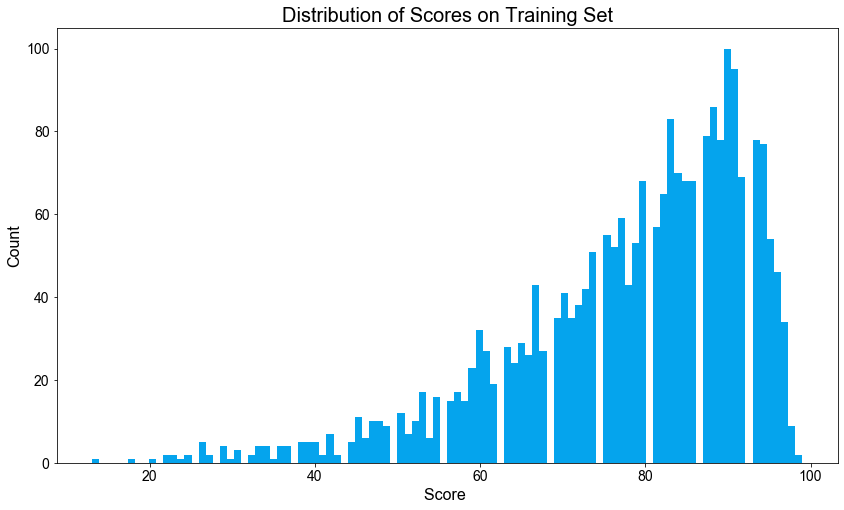

In [11]:
plt.figure(figsize=(14,8))
plt.hist(x = train['review_percent_score'],
         bins = 100,
         color = ['#05a4ed'])
plt.title('Distribution of Scores on Training Set', fontsize=20)
plt.xlabel('Score ', fontsize=16)
plt.ylabel('Count', fontsize=16);

In [12]:
top_25 = train.nlargest(25,'review_percent_score') #Grabs top 25 largest scores from Review Percent Score column
bot_10 = train.nsmallest(10,'review_percent_score') #Same as above, but takes 10 smallest scores
big_90 = train[train['review_percent_score'] >= 90] #Selects for scores 90 or better
big_80 = train[train['review_percent_score'] >= 80] #Selects for all scores 80 or better

In [13]:
big_90.shape

(564, 9)

In [14]:
big_80.shape

(1286, 9)

Let's get this out of the way now, because it speaks volumes about how the Steam Review, and review systems in general, work. A score of 90 under most circumstances is considered fantastic, but over 20% of our data is scored as 90 or greater. Almost 50% is scored 80 or greater. High reviews come quick on Steam, because of one very important change Steam implemented on their front end.  
  
Steam only allows for binary reviews. Users either felt positively about the game, or felt negatively. There is no neutral option, though users can use a text box to elaborate on how they feel. However, the review percent score is a ratio of the Postive and Negative reviews, there is no longer a numeric, or even scale, system available to the user. According to some developer forum members, it's really unclear how older games had their scores migrated over to the new system, so those games may be skewed.

In [15]:
top_25

metascore                                       name console  userscore  \
261          91                        Batman: Arkham City      PC        8.7   
870          80           Dishonored: The Knife of Dunwall      PC        8.3   
29           79                              A Hat in Time      PC        8.4   
869          80           Dishonored: The Brigmore Witches      PC        8.7   
1321         85                     Giants: Citizen Kabuto      PC        8.8   
2285         90                                     Portal      PC        9.2   
2286         95                                   Portal 2      PC        9.0   
3046         86              The Binding of Isaac: Rebirth      PC        8.4   
3325         93                   The Witcher 3: Wild Hunt      PC        9.3   
3326         92  The Witcher 3: Wild Hunt - Blood and Wine      PC        9.2   
3758         79                                    Youropa      PC        6.6   
287          85                        BattleBlock Theater      PC        7.9   
438          83                                   Broforce      PC        8.0   
517          88                                    Celeste      PC        7.2   
648          88                             Counter-Strike      PC        9.2   
755          86             Day of the Tentacle Remastered      PC        7.9   
791          78                                DeathSmiles      PC        7.0   
866          91                                 Dishonored      PC        8.4   
1028         76                              Escape Goat 2      PC        7.5   
1035         79                     Euro Truck Simulator 2      PC        8.7   
1188         81                           Finding Paradise      PC        8.3   
1344         84                                    Gorogoa      PC        8.4   
1364         75                              Gravity Ghost      PC        7.7   
1395         83                                   Gunpoint      PC        8.4   
1405         96                                Half-Life 2      PC        9.1   

     release_date  review_percent_score  hours_played  meta_meta  played_dummy  
261    2011-11-21                  99.0      0.000000      791.7             0  
870    2013-04-16                  99.0      0.000000      664.0             0  
29     2017-10-05                  98.0      0.000000      663.6             0  
869    2013-08-13                  98.0      0.000000      696.0             0  
1321   2000-12-06                  98.0      0.000000      748.0             0  
2285   2007-10-10                  98.0      5.474341      828.0             1  
2286   2011-04-18                  98.0     20.126049      855.0             1  
3046   2014-11-04                  98.0      0.000000      722.4             0  
3325   2015-05-18                  98.0      0.000000      864.9             0  
3326   2016-05-30                  98.0      0.000000      846.4             0  
3758   2018-06-27                  98.0      0.000000      521.4             0  
287    2014-05-15                  97.0      5.902830      671.5             1  
438    2014-04-07                  97.0     26.476923      664.0             1  
517    2018-01-25                  97.0      0.000000      633.6             0  
648    2000-11-08                  97.0    236.375176      809.6             1  
755    2016-03-21                  97.0      0.000000      679.4             0  
791    2016-03-10                  97.0      0.000000      546.0             0  
866    2012-10-08                  97.0     19.601379      764.4             1  
1028   2014-03-24                  97.0      0.000000      570.0             0  
1035   2013-01-16                  97.0     42.262573      687.3             1  
1188   2017-12-14                  97.0      0.000000      672.3             0  
1344   2017-12-14                  97.0      0.000000      705.6             0  
1364   2015-01-26                  9

The Top 25 games is a really curious mix of games. There are some really obvious entities in here, like _The Witcher 3_, _Portal 2_ (side fact: the author's first date with his wife was playing this game), _Arkham City_, and _Euro Truck Simulator 2_, some of the most beloved games for PC. However, there are some games in here that reflect the oddity that is the review system.  
  
_Giants: Citizen Kabuto_, a quirky action game from 2000, has only 58 reviews in total, compared to the hundreds of thousands for _Portal 2_, composed primarily of users who loved the game when it first came out and were willing to re-buy it and review it.

In [16]:
bot_10

metascore                                    name console  userscore  \
1198         23          FlatOut 3: Chaos & Destruction      PC        3.3   
602          64  Command & Conquer 4: Tiberian Twilight      PC        2.1   
119          19         Alone in the Dark: Illumination      PC        1.2   
1383         56               Guardians of Middle-Earth      PC        5.9   
3496         50                                   Tryst      PC        6.4   
1036         69                     Eurofighter Typhoon      PC        7.2   
1307         53                             Gemini Wars      PC        6.5   
2498         43              RollerCoaster Tycoon World      PC        2.1   
321          46                          BeachHead 2000      PC        7.0   
2538         57                                Sacred 3      PC        1.5   

     release_date  review_percent_score  hours_played  meta_meta  played_dummy  
1198   2011-12-13                  13.0      0.000000       75.9             0  
602    2010-03-16                  18.0      0.000000      134.4             0  
119    2015-06-11                  20.0      0.000000       22.8             0  
1383   2013-08-29                  22.0      0.000000      330.4             0  
3496   2012-09-14                  22.0     21.000000      320.0             1  
1036   2001-07-30                  23.0      0.300000      496.8             1  
1307   2012-06-08                  23.0      1.900000      344.5             1  
2498   2016-11-16                  24.0      0.000000       90.3             0  
321    2000-06-14                  25.0      0.000000      322.0             0  
2538   2014-07-31                  25.0     26.083333       85.5             1

### 9.2 Study of Data Distribution and Relationships

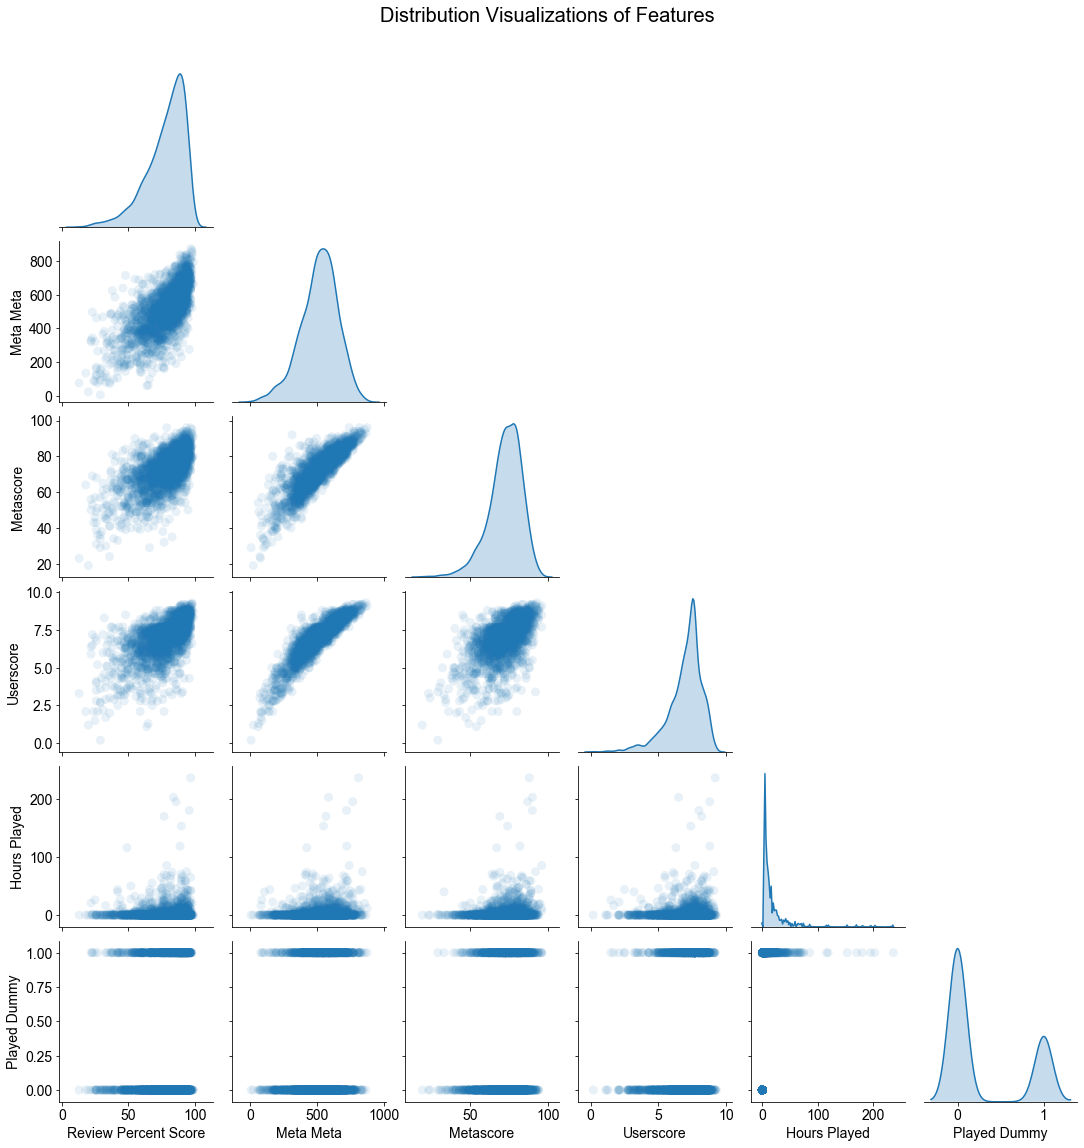

In [50]:
#The below code was modified from the Week 4.2 lesson on Visualiziations by Mahdi Shadkam-Farrokhi.
#Data Prep Block
corr = train.corr() #Gets all correlations between features
col_order = corr.sort_values('review_percent_score', ascending=False).index #Reorders based on correlation with target parameter
ordered_df = train[col_order] #Creates new dataframe to visualize
ordered_df.columns = ordered_df.columns.str.replace("_"," ").str.title() #Makes column titles human readable

pp = sns.pairplot(ordered_df, corner=True, diag_kind='kde', plot_kws = {'alpha': 0.1, 's': 80, 'edgecolor': ''})
pp.fig.suptitle('Distribution Visualizations of Features', y=1.05, fontsize = 20);

There is a general linear trend to our data. 'Meta meta' definitely helped reduce the variance between userscore and metascore that was previously prevalent. Time played doesn't really have a strong correlation to anything, as was expected, but any relationship is a good relationship given that we are feature-light in this model. Also of note is that we are very right-skewed in all our data, which makes sense based on the cloud-density of each our features. It's pretty rare for a game to be horribly received, so there will be  heavier weight towards positive reviews.

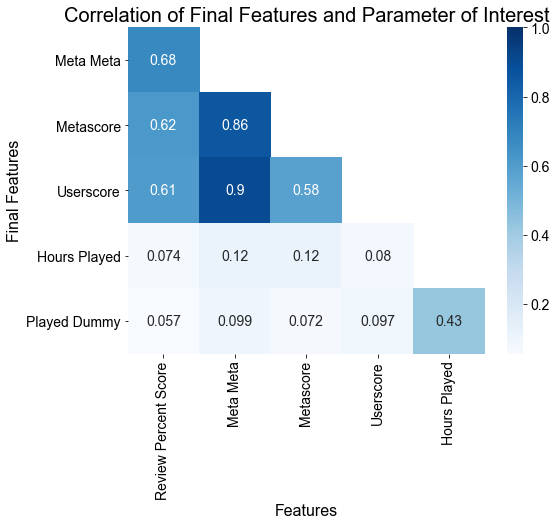

In [51]:
#Plotting block
fig = plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(ordered_df.corr(), annot=True, mask = mask, cmap = 'Blues')
ax.set_title('Correlation of Final Features and Parameter of Interest', fontsize=20)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Final Features', fontsize = 16)
y_min, y_max = ax.get_ylim()
x_min, x_max = ax.get_xlim()
ax.set_ylim(top=y_max+1)
ax.set_xlim(right=x_max-1);

At our best, the Meta Meta feature is the most highly correlated to our target feature, though at .68, that's not as high as it really could be. Obviously our highest correlation is between Meta Meta and its components, Userscore and Metascore. On the opposite end, there is almost zero correlation between any features and Hours Played and Played Dummy, which makes sense that given our data shapes, playtime doesn't really factor into any of our other features.

## 10.0 Modeling
[Return to Table of Contents](#3.0-Table-of-Contents)

### 10.1 Defining X and y

In [19]:
features = ['metascore','userscore','meta_meta', 'hours_played', 'played_dummy']

X = train[features]
y = train['review_percent_score']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = RANDOM_STATE)

### 10.2 Baseline Model - Dummy Regressor

In [21]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
bl_preds = dummy.predict(X_test).round()

In [22]:
def get_scores(model, preds_name):
    print('Training Score:'+str(model.score(X_train,y_train)))  
    print('Testing Score:'+str(model.score(X_test,y_test)))  
    print('Test RMSE:'+str(np.sqrt(mean_squared_error(y_test, preds_name))))

In [23]:
def dist_hist(preds,actuals,title):
    plt.figure(figsize=(14,8))
    plt.hist(x = [actuals,preds],
            bins = 100,
            color = ['#05a4ed', '#fa8900'],
            label = ['Actual Values', 'Predictions'])
    plt.legend(fontsize=16)
    plt.title(f'{title}', fontsize=20)
    plt.xlabel('Score ', fontsize=16)
    plt.ylabel('Count', fontsize=16);

In [78]:
def lin_plot(preds,actuals,title):
    ci = 2*np.sqrt(mean_squared_error(actuals, preds)) #Gives 95% confindence interval
    xfit = np.unique(preds)
    yfit = np.poly1d(np.polyfit(preds, actuals, 1))(np.unique(preds))

    plt.figure(figsize = (9,9))
    plt.scatter(preds,actuals,
            color = ['#fa8900'],
            alpha = .3)
    plt.title(f'{title}', fontsize=20)
    plt.xticks(np.arange(0,100, step = 10))
    plt.yticks(np.arange(0, 100, step = 10))
    plt.xlabel('Predictions', fontsize=16)
    plt.ylabel('Actuals', fontsize=16);
    plt.plot(xfit, yfit)
    plt.fill_between(xfit, yfit - ci, yfit + ci,
                     color='grey', alpha=0.2)

In [79]:
get_scores(dummy, bl_preds)

Training Score:0.0
Testing Score:-7.5976730919968816e-06
Test RMSE:14.69664313523481


This is, hopefully, not a difficult bar to beat. After all, you need only get on the first step to get out of the basement, and these scores are predictably bad. Our RMSE is just shy of 15 points, meaning that for a given game, the best this model can do is predict a 30-point spread, which is an unacceptable level of variance.

### 10.3 Linear Regressor

There was a "blob" effect in the earlier data distributions we saw, but also visible linear trend. Due that trend, we are starting with a basic Linear Regression model.

In [80]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test).round()

In [81]:
get_scores(lr, lr_preds)

Training Score:0.46919066146042193
Testing Score:0.492150842281429
Test RMSE:10.48817124722471


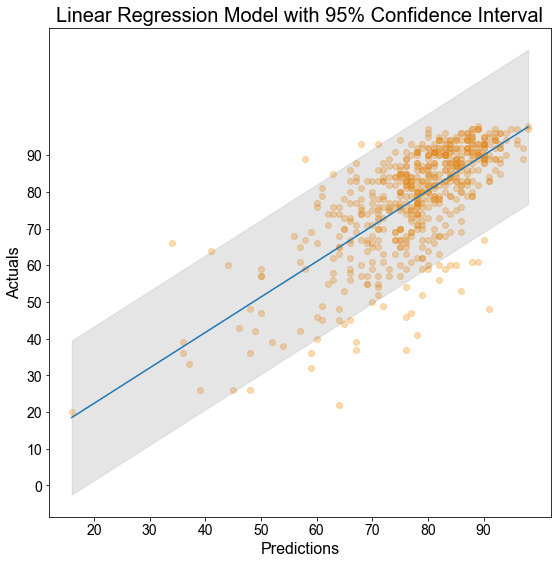

In [104]:
lin_plot(lr_preds, y_test, 'Linear Regression Model with 95% Confidence Interval')

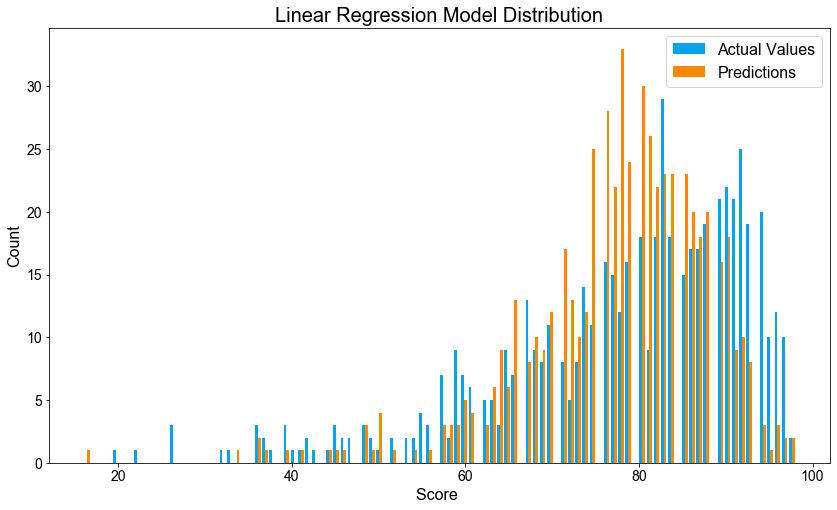

In [83]:
dist_hist(lr_preds, y_test, 'Linear Regression Model Distribution')

The Linear Regression model is actually skewed slightly more left than our data, which unfortunately is already an indicator that we're not going to be predicting the higher end of our scores correctly. You can see that the peak of our Linear regression model is around the 80s, while the peak of our actual data is in the 90s.
  
This is a marked improvement over our baseline model on scores, but the low scores are showing a trend of underfitting. This is expected, given that we don't have a lot to give our model in the way of features in the first place, and there was already not a high correlation between those features. Regularization won't do much to help us, as we're trying to fit a line to blob and our model isn't overfit. We're going to move on to boosting, which will help us make the most of our small number of features, and hopefully improve performance.

### 10.4 AdaBoost Regressor

In [84]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state = RANDOM_STATE) #I am locking these boosting models with a random state and best params
ada_params = {
    'n_estimators': [12], #Lock to best-performing parameters after testing, without rewriting GridSearch cells
    'base_estimator__max_depth': [4],
    'learning_rate': [.1]
}
gs_ada = GridSearchCV(ada, param_grid=ada_params, cv=5)
gs_ada.fit(X_train, y_train)
ada_preds = gs_ada.predict(X_test).round()
gs_ada.best_params_

{'base_estimator__max_depth': 4, 'learning_rate': 0.1, 'n_estimators': 12}

In [85]:
get_scores(gs_ada, ada_preds)

Training Score:0.5040555476073902
Testing Score:0.47800244075218945
Test RMSE:10.603655030224248


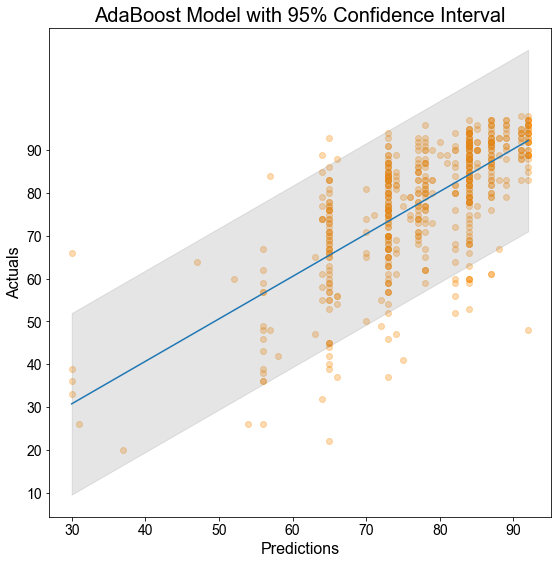

In [103]:
lin_plot(ada_preds, y_test, 'AdaBoost Model with 95% Confidence Interval')

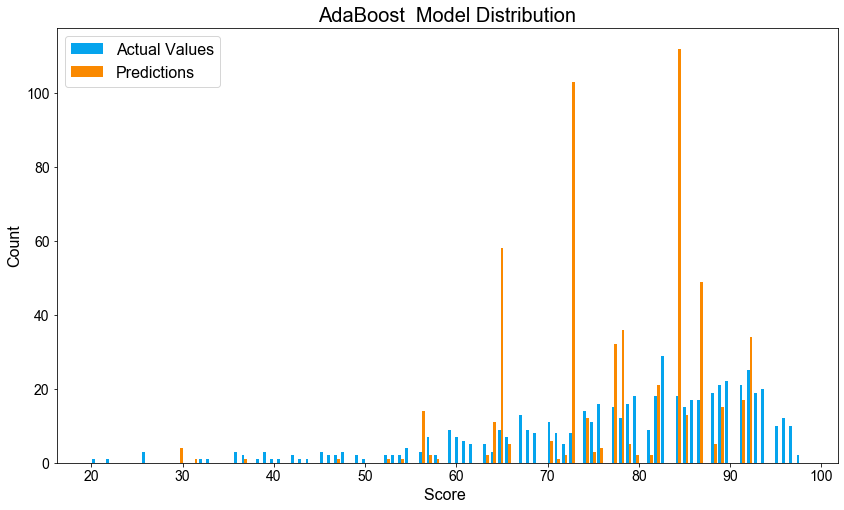

In [87]:
dist_hist(ada_preds, y_test, 'AdaBoost  Model Distribution')

Unlike the Linear Regression, the predictions are all over the map on the AdaBoost. It is vaguely the same shape, but it is latching on to certain spikes and missing the overall data trend.

AdaBoost actually saw an increase in RMSE compared to Linear Regression. More importantly, while the RMSE is close to the Linear Regression model, the prediction distribution looks nothing like the actual data. During initial testing of these two forms of boosting, I had more success with GradientBoost in terms of scoring.

### 10.5 GradientBoost Regressor

In [88]:
grad = GradientBoostingRegressor(random_state = RANDOM_STATE)
grad_params = {
    'max_depth': [2.1], #Lock to best-performing parameters after testing, without rewriting GridSearch cells
    'n_estimators': [56],
    'learning_rate': [.114]
}
gs_grad = GridSearchCV(grad, param_grid=grad_params, cv=5)
gs_grad.fit(X_train, y_train)
grad_preds = gs_grad.predict(X_test).round()
gs_grad.best_params_

{'learning_rate': 0.114, 'max_depth': 2.1, 'n_estimators': 56}

In [89]:
get_scores(gs_grad, grad_preds)

Training Score:0.5247279185833726
Testing Score:0.4850245735222428
Test RMSE:10.547511554864494


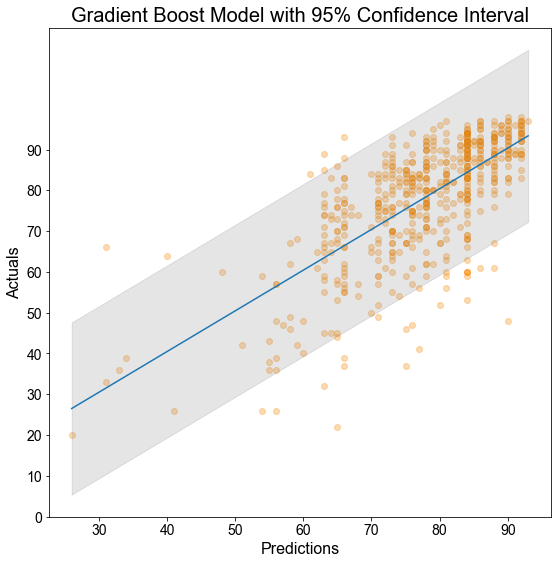

In [105]:
lin_plot(grad_preds, y_test, 'Gradient Boost Model with 95% Confidence Interval')

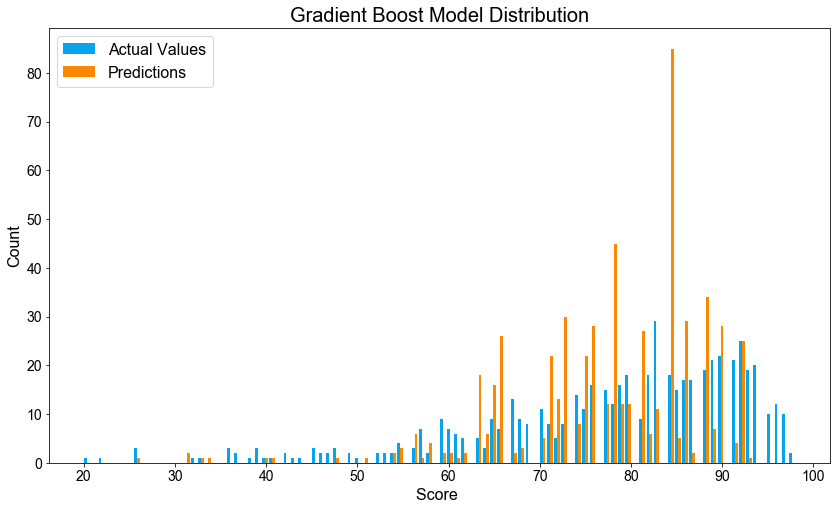

In [91]:
dist_hist(grad_preds, y_test, 'Gradient Boost Model Distribution')

Like the AdaBoost model, the GradientBoost model is matching the general shape, but missing a lot of predictions, or latching onto very specific spikes while completely missing others.

I spent a considerable amount of time tweaking hyperparameters on GradientBoost, which was the more promising of the two boosting models, but we're still 1.5 points above the basic Linear Regression model. We're going to move on to a RandomForest model, but if that still can't get me ahead, we'll go back and tweak the Linear Regression parameters and try to tune that.

### 10.6 Random Forest Regressor

In [92]:
rf = RandomForestRegressor(n_estimators=100, random_state = RANDOM_STATE)
rf_params = {
    'n_estimators': [150], #Lock to best-performing parameters after testing, without rewriting GridSearch cells
    'max_depth': [4],
}
gs_rf = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs_rf.fit(X_train, y_train)
rf_preds = gs_rf.predict(X_test).round()
gs_rf.best_params_

{'max_depth': 4, 'n_estimators': 150}

In [93]:
get_scores(gs_rf, rf_preds)

Training Score:0.5166870485677519
Testing Score:0.47995616777895145
Test RMSE:10.592843496121962


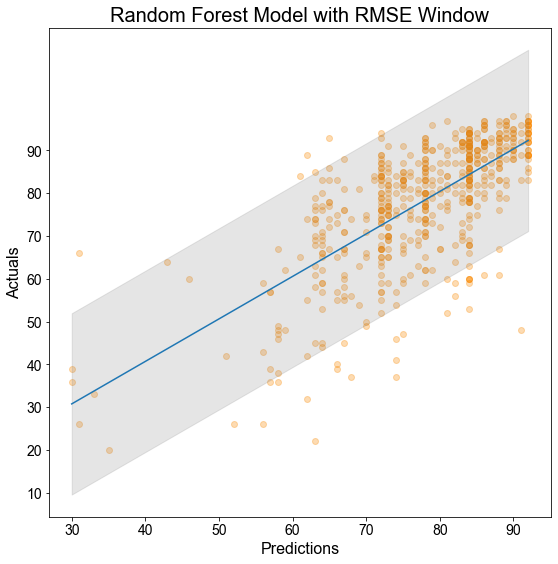

In [94]:
lin_plot(rf_preds, y_test, 'Random Forest Model with RMSE Window')

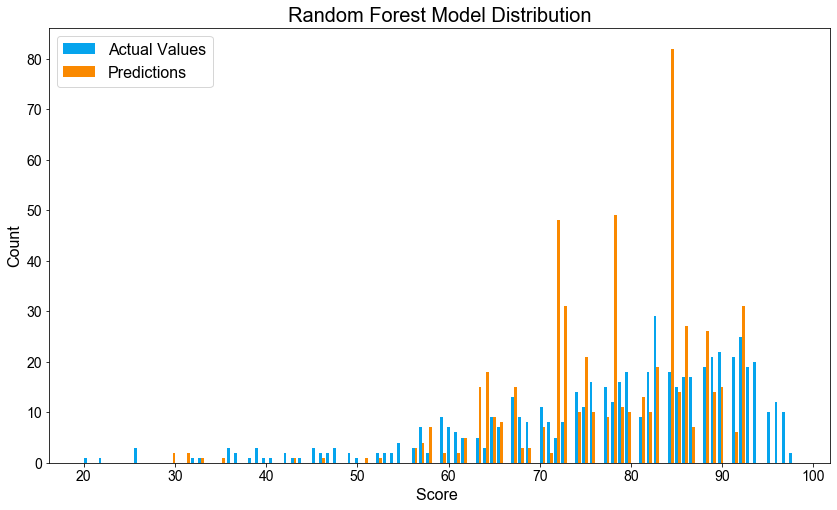

In [95]:
dist_hist(rf_preds, y_test, 'Random Forest Model Distribution')

This is doing even worse than the Gradient Boost most times, and given that it is random, it's practically impossible to tune this model to try for consistent results. Re-running the cell results in a new best_params dictionary each time.
  
Given my experience with the above, I have opted to not continue to the Extra Trees model, or frankly any other models, and just return to the Linear Regression, which to date, despite its basic nature, is giving me the best score.

## 11.0 Model Selection
[Return to Table of Contents](#3.0-Table-of-Contents)

The below table summarizes and compares the above five models' RMSE scores:

| Model Name | Testing Score | Training Score | RMSE |
| --- | --- | --- | --- |
| [Baseline](#10.2-Baseline-Model---Dummy-Regressor) | 0 | 0 | 14.7 |
| [Linear Regressor](#10.3-Linear-Regressor) | .47 | .49 | 10.47 |
| [AdaBoost Regressor](#10.4-AdaBoost-Regressor) | .50 | .48 | 10.62 |
| [GradientBoost Regressor](#10.5-GradientBoost-Regressor) | .52 | .49 | 10.55 |
| [Random Forest Regressor](#10.6-Random-Forest-Regressor)  | .51 | .48 | 10.54 |

Based on RMSE, our Linear Regressor is a close winner. Given that Review Percent Score is on a scale of 1-100, all models performed within about 1/10th of a review percentage point of each other, so frankly any of these models works about as well as any other. Given the linear trend of our data though, the Linear Regression makes sense as the best-fitting option for our circumstances, especially when we view the distribution of predictions and notice that the boosting models match shape, but frequently mis-predict. 

## 12.0 Model Evaluation and Results
[Return to Table of Contents](#3.0-Table-of-Contents)

Based on the below RMSEs, it is very clear that the best-performing model in this case is also the most elementary. Our simple Linear Regression, with no boosting, regularizing, or hyperparameter tuning of any kind, out-performed many other more advanced models.

### 12.1 Prepping the Holdout Set and Getting Predictions

In [96]:
X = test[features]
lr_test_preds = lr.predict(X).round()

### 12.2 Inserting Predictions Back into Dataframe

In [97]:
results = test.copy()
results['review_percent_score'] = lr_test_preds
results

metascore                              name console  userscore  \
1            59                    007: NightFire      PC        6.0   
2            70            007: Quantum of Solace      PC        6.1   
5            74         1503 A.D. - The New World      PC        7.6   
6            79                         1701 A.D.      PC        8.2   
9            69                            1nsane      PC        7.6   
...         ...                               ...     ...        ...   
3779         68                   Zoo Tycoon 2001      PC        7.7   
3780         64  Zoo Tycoon 2: Endangered Species      PC        7.8   
3781         67         Zoo Tycoon: Dinosaur Digs      PC        7.1   
3782         71          Zoo Tycoon: Marine Mania      PC        7.4   
3787         66                       kill.switch      PC        7.4   

     release_date  review_percent_score  hours_played  meta_meta  played_dummy  
1      2002-11-28                  66.0           0.0      354.0             0  
2      2008-11-04                  73.0           0.0      427.0             0  
5      2003-03-23                  82.0           0.0      562.4             0  
6      2006-11-06                  87.0           0.0      647.8             0  
9      2001-02-05                  79.0           0.0      524.4             0  
...           ...                   ...           ...        ...           ...  
3779   2001-10-17                  79.0           0.0      523.6             0  
3780   2005-10-19                  77.0           0.0      499.2             0  
3781   2002-05-19                  76.0           0.0      475.7             0  
3782   2002-10-21                  79.0           0.0      525.4             0  
3787   2004-03-30                  76.0           0.0      488.4             0  

[1486 rows x 9 columns]

### 12.3 Plotting Predictions Against Training Values

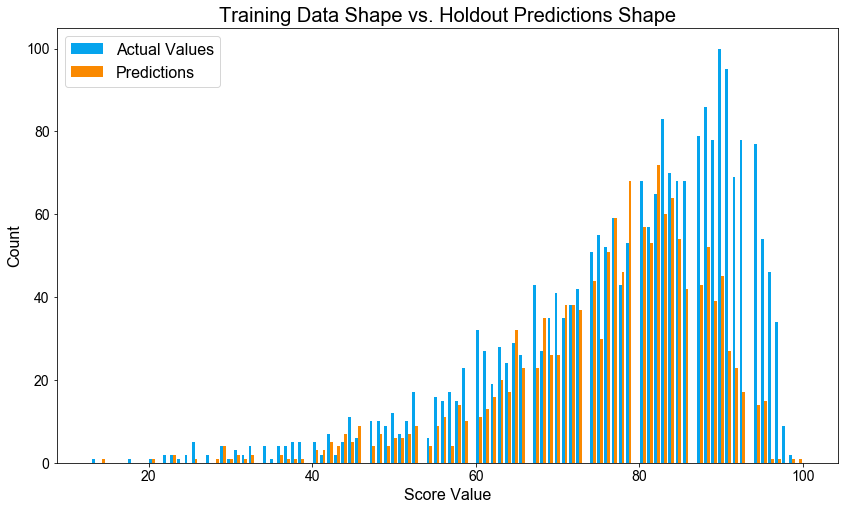

In [98]:
plt.figure(figsize=(14,8))
plt.hist(x = [train['review_percent_score'], results['review_percent_score']],
         bins = 100,
         color = ['#05a4ed', '#fa8900'],
         label = ['Actual Values', 'Predictions'])
plt.legend(fontsize=16)
plt.title('Training Data Shape vs. Holdout Predictions Shape', fontsize=20)
plt.xlabel('Score Value', fontsize=16)
plt.ylabel('Count', fontsize=16);

Like the training fit of the Linear Regression model, our holdout data roughly matches the shape of our existing Training data, though is slightly less left-skewed in its predictions. Unfortunately, that means we are, once again, missing out on what are likely a lot of higher-scoring games and "undervaluing" properties. However, that is the better of the two possible outcomes here, as underpredicting a game and having our expectations exceeded is better than overpredicting a game and having it fall short.

### 12.4 Assessment of Predictions Against Real-World Results

In [99]:
results.sort_values('review_percent_score',ascending=False).head(10) #Select Top 10

metascore                                             name console  \
3193         96                                   The Orange Box      PC   
248          95                 Baldur's Gate II: Shadows of Amn      PC   
3603         92                     Warcraft III: Reign of Chaos      PC   
3192         91              The Operative: No One Lives Forever      PC   
1513         89                             Homeworld: Cataclysm      PC   
2110         91  No One Lives Forever 2: A Spy in H.A.R.M.'s Way      PC   
260          91                            Batman: Arkham Asylum      PC   
1893         91                   Medal of Honor: Allied Assault      PC   
1542         91                                   IL-2 Sturmovik      PC   
2461         89                                  Rise of Nations      PC   

      userscore release_date  review_percent_score  hours_played  meta_meta  \
3193        9.2   2007-10-10                 100.0           0.0      883.2   
248         9.2   2000-09-24                  99.0           0.0      874.0   
3603        9.1   2002-07-03                  97.0           0.0      837.2   
3192        8.8   2000-11-11                  96.0           0.0      800.8   
1513        8.8   2000-09-07                  95.0           0.0      783.2   
2110        8.7   2002-09-30                  95.0           0.0      791.7   
260         8.7   2009-09-15                  95.0           0.0      791.7   
1893        8.6   2002-01-20                  95.0           0.0      782.6   
1542        8.7   2001-11-18                  95.0           0.0      791.7   
2461        8.9   2003-05-20                  95.0           0.0      792.1   

      played_dummy  
3193             0  
248              0  
3603             0  
3192             0  
1513             0  
2110             0  
260              0  
1893             0  
1542             0  
2461             0

In [100]:
results.sort_values('review_percent_score',ascending=True).head(10) #Select Bottom 10

metascore                                     name console  userscore  \
2452         16                Ride to Hell: Retribution      PC        1.2   
1570         20  Infestation: Survivor Stories The War Z      PC        1.7   
2360         26                        R.I.P.D. The Game      PC        1.5   
1732         20      Leisure Suit Larry: Box Office Bust      PC        2.3   
3021         24             Terrawars: New York Invasion      PC        2.4   
1235         27                                     Fray      PC        2.4   
2383         34                    Rambo: The Video Game      PC        1.6   
2964         26                            Survivor 2001      PC        2.6   
526          26        Charlie and the Chocolate Factory      PC        2.6   
1728         36                       Legends of Pegasus      PC        1.5   

     release_date  review_percent_score  hours_played  meta_meta  played_dummy  
2452   2013-06-24                  14.0      0.000000       19.2             0  
1570   2012-10-15                  20.0      0.000000       34.0             0  
2360   2013-07-16                  23.0      0.000000       39.0             0  
1732   2009-03-31                  23.0      0.000000       46.0             0  
3021   2006-07-06                  26.0      0.000000       57.6             0  
1235   2012-02-08                  28.0      0.000000       64.8             0  
2383   2014-02-21                  29.0      0.000000       54.4             0  
2964   2001-11-12                  29.0      0.000000       67.6             0  
526    2005-07-12                  29.0      0.000000       67.6             0  
1728   2012-08-10                  29.0      8.133333       54.0             1

In [101]:
results[results['name'].str.contains('World of Warcraft')] #Filter for household-name titles

metascore                                       name console  userscore  \
3700         93                          World of Warcraft      PC        7.3   
3701         79      World of Warcraft: Battle for Azeroth      PC        3.1   
3702         90               World of Warcraft: Cataclysm      PC        5.6   
3703         88                  World of Warcraft: Legion      PC        7.3   
3704         82       World of Warcraft: Mists of Pandaria      PC        5.0   
3705         91     World of Warcraft: The Burning Crusade      PC        8.0   
3706         87     World of Warcraft: Warlords of Draenor      PC        5.9   
3707         91  World of Warcraft: Wrath of the Lich King      PC        7.6   

     release_date  review_percent_score  hours_played  meta_meta  played_dummy  
3700   2004-11-23                  91.0           0.0      678.9             0  
3701   2018-08-13                  66.0           0.0      244.9             0  
3702   2010-12-07                  83.0           0.0      504.0             0  
3703   2016-08-30                  88.0           0.0      642.4             0  
3704   2012-09-25                  76.0           0.0      410.0             0  
3705   2007-01-16                  93.0           0.0      728.0             0  
3706   2014-11-13                  82.0           0.0      513.3             0  
3707   2008-11-13                  91.0           0.0      691.6             0

In [102]:
train[train['name'].str.contains('Call of Duty')]

metascore                            name console  userscore  \
475         91                    Call of Duty      PC        8.5   
476         86                  Call of Duty 2      PC        8.4   
477         92  Call of Duty 4: Modern Warfare      PC        8.5   
479         81         Call of Duty: Black Ops      PC        5.3   
481         74      Call of Duty: Black Ops II      PC        4.3   
482         73     Call of Duty: Black Ops III      PC        3.0   
483         68            Call of Duty: Ghosts      PC        2.1   
484         73  Call of Duty: Infinite Warfare      PC        3.4   
485         86  Call of Duty: Modern Warfare 2      PC        4.3   
487         87  Call of Duty: United Offensive      PC        8.2   
488         73              Call of Duty: WWII      PC        3.3   
489         83      Call of Duty: World at War      PC        7.5   

    release_date  review_percent_score  hours_played  meta_meta  played_dummy  
475   2003-10-29                  93.0      2.966667      773.5             1  
476   2005-10-25                  91.0      5.187500      722.4             1  
477   2007-11-05                  92.0      0.000000      782.0             0  
479   2010-11-09                  89.0      0.000000      429.3             0  
481   2012-11-12                  85.0      0.000000      318.2             0  
482   2015-11-05                  69.0      0.000000      219.0             0  
483   2013-11-04                  59.0      0.000000      142.8             0  
484   2016-11-04                  46.0      0.000000      248.2             0  
485   2009-11-10                  92.0      0.000000      369.8             0  
487   2004-09-14                  86.0      0.000000      713.4             0  
488   2017-11-03                  60.0      0.000000      240.9             0  
489   2008-11-10                  93.0      0.000000      622.5             0

Before analyzing the data, we should establish a benchmark for commercial success. I am considering a game clearing 1 million units in sales to be a major success, though that is a very high bar to meet, and many studios have achieved profitability well below that threshhold. I'm focusing on that number because games that reach that value are also likely household names. 

Predictions are, it seems, pretty on point here. Our top 3 scores are a who's-who of classics. _The Orange Box_, while no longer distributed, was a bundle of Valve's "greatest hits," including _Portal_, _Half-Life 2_, and _Team Fortress 2_. It sold around 3 million units by 2008, according to games magazine Gamasutra.  
  
Likewise, _Baldur's Gate II_ sold 2 million units per Bioware, its developer's, sales figures. And of course, _Warcraft III: Reign of Chaos_, which also cleared 3 million in sales before being eclipsed by _World of Warcraft_, which per our search below has a 90.6 Review Percent Score and has grossed in excess of $9 Billion dollars between 2004 and 2017.  
  
I managed to find _Ride to Hell: Retribution_ on SteamDB under a different name when doing this evaluation assessment. Where my model predicted a dismal 18.3, Steam's actual percent score for this game is a staggering 45. _Ride to Hell_ presents a very interesting point as to why review percent score may not be the best metric to check a game's commercial success against.  
  
Ride to Hell is considered to be one of the worst games ever made. Ben Croshaw, a reviewer for _The Escapist_ magazine and host of Zero Punctuation, awarded it the "Lifetime Achievement Award for Total Abhorrence" and said that "releasing every box with no disc would have been less of a mistake." He makes the point that it is so bad that it has come full circle and achieved some minor commercial success on the grounds that it is so bad that it merits buying just to witness it, which would explain its surprisingly high score. While the game was listed on SteamDB, I could not find it on the Steam store itself.  
  
Similarly bucking the trend, Call of Duty: Black Ops III, with an actual mediocre review percent score of 69, grossed $550 million in sales in the first (3) days of release and sold 6.6 million copies by the end of that week, making it a staggering commercial success. Likewise, _Call of Duty: WWII_, with its mediocre score of 60, cleared 6 million copies as of January 2020.

## 13.0 Conclusions
[Return to Table of Contents](#3.0-Table-of-Contents)

First and foremost, our model was not an effective predictor of review percent score. A 21-point window, despite being markedly better than our baseline 30 points, is still a vast discrepancy. Our target was to reach a 10-point window (an RMSE of 5 or better), but given the lack of features we could find, it's unlikely that the amount of data available to the average developer or publisher just prior to the launch window will be enough to accurately predict user reaction or revenue models.  
  
More importantly though, the study of this model has highlighted some interesting trends in the review section of Steam. Professional opinion isn't always the bellweather for what the broader gaming community's opinion will be. Even users on one website, such as Metacritic, may feel very different than users on another, such as Steam.  
  
Most importantly, Review Percent Score is not an effective metric on its own to predict the commercial success of a game.

## 14.0 References
[Return to Table of Contents](#3.0-Table-of-Contents)

A tremendous thanks to SteamDB developers xPaw and Marlamin, who helped me verify to confirm my app_ids matched their respective titles and scores. Additionally a huge thanks to SteamSpy developer Sergey Galyonkin, who kindly offered to help me automate data collection from his system, but didn't have the capacity to do it within the Capstone window.  
  
Additionally, a huge thanks to Steam users HendrickFalcon, Pyromancer, Najas, Lokeet, Milktea9, Spragoon, Chaella, Garflow, Prevengineer, Kyathil, AtlasBurden, DrunkPak, Citizen Khaelis, Chaunsay, Overdrive9, Runman, and Hexadrine. Their participation in my study and insight about user experience, rating games, "hours played", and in Pyromancer's case, the back end of Steam's system, were invaluable in helping select features when initially data collecting.  
  
Lastly, thank you to Dr. John Abel, whose experience with plotting data using matplotlib was invaluable when concepting visuals and playing with visual parameters for impact, as well as answering lots of questions about debugging graphs.  

**Outside Sources:**  
1) https://www.gamasutra.com/view/news/112269/Analysis_Valves_Lifetime_Retail_Sales_For_HalfLife_CounterStrike_Franchises.php  
2) https://en.wikipedia.org/wiki/List_of_best-selling_PC_games#cite_note-8  
3) https://en.wikipedia.org/wiki/World_of_Warcraft#:~:text=World%20of%20Warcraft%20was%20the,game%20franchises%20of%20all%20time  
4) https://en.wikipedia.org/wiki/Call_of_Duty:_Black_Ops_III#Sales  
5) https://en.wikipedia.org/wiki/Steam_(service)#:~:text=The%20Steam%20platform%20is%20the,of%20global%20PC%20game%20sales  
6) https://www.statista.com/statistics/321374/global-all-time-unit-sales-call-of-duty-games/#:~:text=One%20of%20its%20successors%2C%20Call,copies%20as%20of%20January%202020.  
7) https://www.kaggle.com/tamber/steam-video-games  
8) https://www.kaggle.com/destring/metacritic-reviewed-games-since-2000